In [1]:
import cnn_train
import numpy as np
import torchvision
from cnn_model import VGG, VGG_CNF
import matplotlib.pyplot as plt

# Define default values
LEARNING_RATE_DEFAULT = 1e-4
BATCH_SIZE_DEFAULT = 32
MAX_EPOCHS_DEFAULT = 500
EVAL_FREQ_DEFAULT = 25
OPTIMIZER_DEFAULT = 'ADAM'

In [2]:
# Get data
trainset, testset = cnn_train.generate_CIFAR10()
# Dataset size
print('Dataset size: ')
print('train dataset size: {}'.format(len(trainset)))
print('test dataset size: {}'.format(len(testset)))
print()
example = trainset[0]
X, y = example
# Image shape
print('Image shape')
print(X.shape)

Dataset size: 
train dataset size: 50000
test dataset size: 10000

Image shape
torch.Size([3, 32, 32])


In [3]:
# Use B type VGG
layers = VGG_CNF['B']
print('Structure:')
print(layers)
print()

Structure:
[64, 64, 'pool', 128, 128, 'pool', 256, 256, 'pool', 512, 512, 'pool', 512, 512, 'pool']



In [4]:
record_epochs, accs, losses = cnn_train.train(
    net=VGG,
    trainset=trainset,
    testset=testset,
    n_channels=3,
    layers=layers,
    n_classes=10,
    epochs=MAX_EPOCHS_DEFAULT,
    learning_rate=LEARNING_RATE_DEFAULT,
    batch_size=512,
    eval_freq=EVAL_FREQ_DEFAULT
)

/root/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch: 25, loss: 2.549448, test acc: 0.8118
epoch: 50, loss: 2.516566, test acc: 0.8245
epoch: 75, loss: 2.506778, test acc: 0.8349
epoch: 100, loss: 2.501395, test acc: 0.8337
epoch: 125, loss: 2.496583, test acc: 0.8416
epoch: 150, loss: 2.494661, test acc: 0.8488
epoch: 175, loss: 2.491652, test acc: 0.8431
epoch: 200, loss: 2.490342, test acc: 0.8503
epoch: 225, loss: 2.48809, test acc: 0.8527
epoch: 250, loss: 2.487432, test acc: 0.8561
epoch: 275, loss: 2.487009, test acc: 0.8567
epoch: 300, loss: 2.485746, test acc: 0.8583
epoch: 325, loss: 2.484265, test acc: 0.8566
epoch: 350, loss: 2.483766, test acc: 0.8602
epoch: 375, loss: 2.484325, test acc: 0.8592
epoch: 400, loss: 2.483796, test acc: 0.8592
epoch: 425, loss: 2.483852, test acc: 0.8597
epoch: 450, loss: 2.483366, test acc: 0.8624
epoch: 475, loss: 2.482643, test acc: 0.8647
epoch: 500, loss: 2.482933, test acc: 0.8598


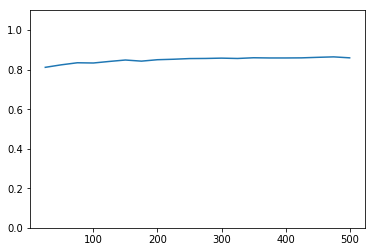

In [5]:
# accuracy curve of validataion data
acc_plot = plt.plot(record_epochs, accs)
plt.ylim([0, 1.1])
plt.show()
plt.close()

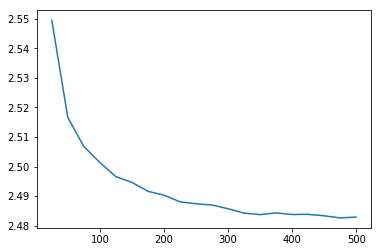

In [6]:
# loss curve of training data
losses = plt.plot(record_epochs, losses)
plt.show()
plt.close()